<a href="https://colab.research.google.com/github/amkayhani/Statistics/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting with time-series

A company is interested to predict their sales for next year. The following data have been collected.

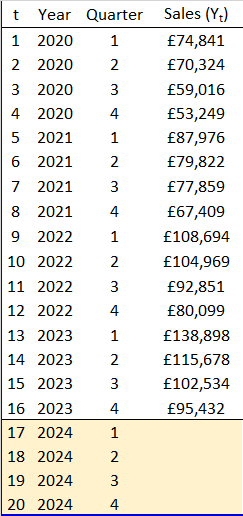

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define the data
data = {
    "t": range(1, 21),
    "Year": [2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024],
    "Quarter": [1, 2, 3, 4] * 5,
    "Sales (Yt)": [74841, 70324, 59016, 53249, 87976, 79822, 77859, 67409, 108694, 104969, 92851, 80099, 138898, 115678, 102534, 95432, np.nan, np.nan, np.nan, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate CMA(4) with custom weights
def calculate_custom_cma(series):
    cma_values = [np.nan, np.nan]  # First two values are NaN
    for i in range(2, len(series) - 2):
        weighted_sum = 0.5 * series[i-2] + series[i-1] + series[i] + series[i+1] + 0.5 * series[i+2]
        cma = weighted_sum / 4
        cma_values.append(cma)
    cma_values.extend([np.nan, np.nan])  # Last two values are NaN
    return cma_values

df["CMA(4)"] = calculate_custom_cma(df["Sales (Yt)"])

# Calculate 'St (with It)'
df['St (with It)'] = df['Sales (Yt)'] / df['CMA(4)']

# Calculate 'St (without It)'
def calculate_st_without_it(df, quarter):
    st_with_it_values = df[df['Quarter'] == quarter]['St (with It)'].dropna()
    return st_with_it_values.mean()

for quarter in range(1, 5):
    df.loc[df['Quarter'] == quarter, 'St (without It)'] = calculate_st_without_it(df, quarter)

# Manually set 'St (without It)' for t4 based on provided constant
df.loc[df['t'] == 4, 'St (without It)'] = 0.77

# Calculate 'Deseasonalize (Yt / St)'
df['Deseasonalize (Yt / St)'] = df['Sales (Yt)'] / df['St (without It)']

# Display the complete DataFrame
df


,t,Year,Quarter,Sales (Yt),CMA(4),St (with It),St (without It),Deseasonalize (Yt / St)
0,1,2020,1,74841.0,NaN,NaN,1.229050,60893.361708
1,2,2020,2,70324.0,NaN,NaN,1.062575,66182.644477
2,3,2020,3,59016.0,65999.375,0.894190,0.927222,63648.155260
3,4,2020,4,53249.0,68828.500,0.773648,0.770000,69154.545455
4,5,2021,1,87976.0,72371.125,1.215623,1.229050,71580.475803
5,6,2021,2,79822.0,76496.500,1.043473,1.062575,75121.310611
6,7,2021,3,77859.0,80856.250,0.962931,0.927222,83970.138953
7,8,2021,4,67409.0,86589.375,0.778490,0.770354,87503.935129
8,9,2022,1,108694.0,91606.750,1.186528,1.229050,88437.394709
9,10,2022,2,104969.0,95067.000,1.104158,1.062575,98787.412663


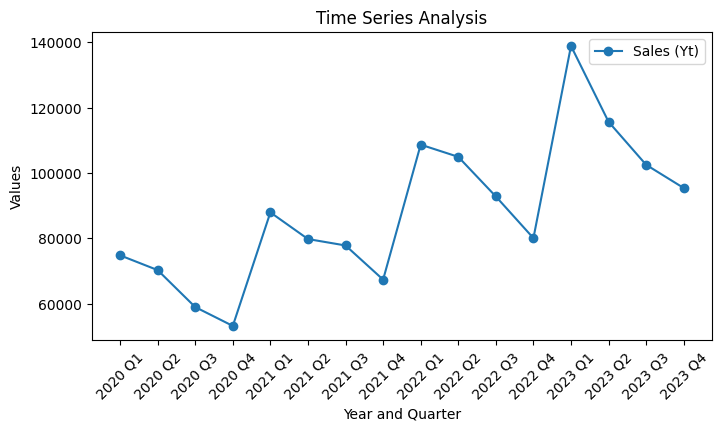

In [2]:
import matplotlib.pyplot as plt

# Create a new column for 'Year_Quarter' to use on the X-axis
df['Year_Quarter'] = df['Year'].astype(str) + ' Q' + df['Quarter'].astype(str)

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot 'Sales (Yt)'
plt.plot(df['Year_Quarter'], df['Sales (Yt)'], marker='o', label='Sales (Yt)', linestyle='-')

# Adding title and labels
plt.title('Time Series Analysis')
plt.xlabel('Year and Quarter')
plt.ylabel('Values')

# Adding legend
plt.legend()

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


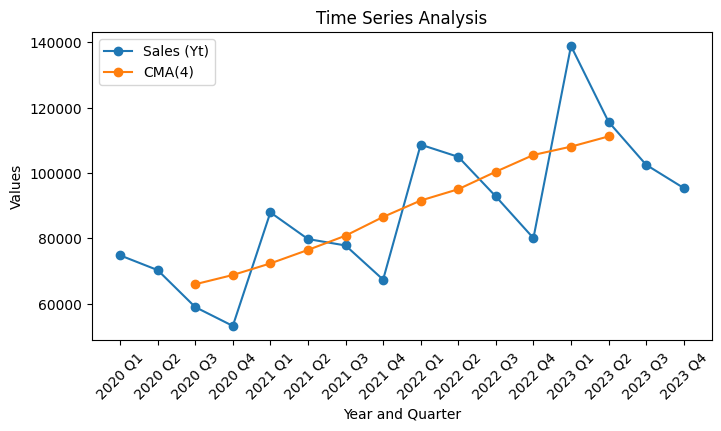

In [3]:
import matplotlib.pyplot as plt

# Create a new column for 'Year_Quarter' to use on the X-axis
df['Year_Quarter'] = df['Year'].astype(str) + ' Q' + df['Quarter'].astype(str)

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot 'Sales (Yt)'
plt.plot(df['Year_Quarter'], df['Sales (Yt)'], marker='o', label='Sales (Yt)', linestyle='-')

# Plot 'CMA(4)'
plt.plot(df['Year_Quarter'], df['CMA(4)'], marker='o', label='CMA(4)', linestyle='-')

# Adding title and labels
plt.title('Time Series Analysis')
plt.xlabel('Year and Quarter')
plt.ylabel('Values')

# Adding legend
plt.legend()

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


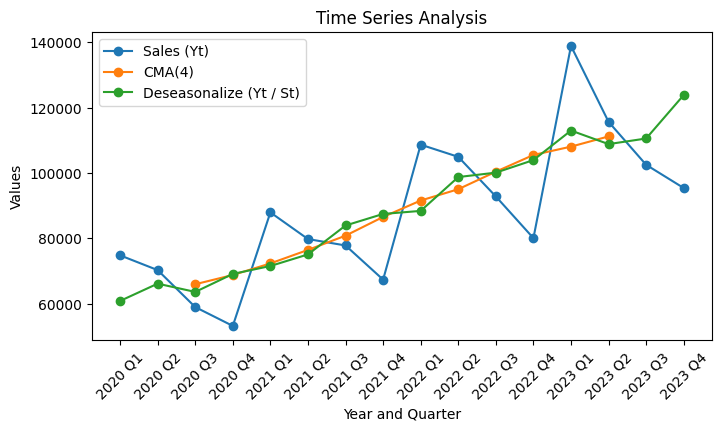

In [4]:
import matplotlib.pyplot as plt

# Create a new column for 'Year_Quarter' to use on the X-axis
df['Year_Quarter'] = df['Year'].astype(str) + ' Q' + df['Quarter'].astype(str)

# Set the figure size
plt.figure(figsize=(8, 4))

# Plot 'Sales (Yt)'
plt.plot(df['Year_Quarter'], df['Sales (Yt)'], marker='o', label='Sales (Yt)', linestyle='-')

# Plot 'CMA(4)'
plt.plot(df['Year_Quarter'], df['CMA(4)'], marker='o', label='CMA(4)', linestyle='-')

# Plot 'Deseasonalize (Yt / St)'
plt.plot(df['Year_Quarter'], df['Deseasonalize (Yt / St)'], marker='o', label='Deseasonalize (Yt / St)', linestyle='-')

# Adding title and labels
plt.title('Time Series Analysis')
plt.xlabel('Year and Quarter')
plt.ylabel('Values')

# Adding legend
plt.legend()

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# **Simple linear regression:**

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
# Perform linear regression using OLS
regression_data = df.dropna(subset=['Deseasonalize (Yt / St)'])
X = sm.add_constant(regression_data['t'])
y = regression_data['Deseasonalize (Yt / St)']
model = sm.OLS(y, X).fit()
intercept, t_coefficient = model.params

# Calculate 'Tt'
df['Tt'] = intercept + df['t'] * t_coefficient

# Getting the model parameters for the formula
intercept, slope = model.params

# Calculating MSE and R^2
mse = mean_squared_error(df['Deseasonalize (Yt / St)'][:16].dropna(), df['Tt'][:16].dropna())
r2 = r2_score(df['Deseasonalize (Yt / St)'][:16].dropna(), df['Tt'][:16].dropna())

pd.options.display.float_format = '{:.4f}'.format

print("r^2=",r2)
print(f'Regression Equation: y = {t_coefficient:.2f}t + ({intercept:.2f})')
df

r^2= 0.97366792824875
Regression Equation: y = 4134.36t + (53966.46)


,t,Year,Quarter,Sales (Yt),CMA(4),St (with It),St (without It),Deseasonalize (Yt / St),Year_Quarter,Tt
0,1,2020,1,74841.0000,NaN,NaN,1.2291,60893.3617,2020 Q1,58100.8135
1,2,2020,2,70324.0000,NaN,NaN,1.0626,66182.6445,2020 Q2,62235.1713
2,3,2020,3,59016.0000,65999.3750,0.8942,0.9272,63648.1553,2020 Q3,66369.5290
3,4,2020,4,53249.0000,68828.5000,0.7736,0.7700,69154.5455,2020 Q4,70503.8867
4,5,2021,1,87976.0000,72371.1250,1.2156,1.2291,71580.4758,2021 Q1,74638.2445
5,6,2021,2,79822.0000,76496.5000,1.0435,1.0626,75121.3106,2021 Q2,78772.6022
6,7,2021,3,77859.0000,80856.2500,0.9629,0.9272,83970.1390,2021 Q3,82906.9599
7,8,2021,4,67409.0000,86589.3750,0.7785,0.7704,87503.9351,2021 Q4,87041.3177
8,9,2022,1,108694.0000,91606.7500,1.1865,1.2291,88437.3947,2022 Q1,91175.6754
9,10,2022,2,104969.0000,95067.0000,1.1042,1.0626,98787.4127,2022 Q2,95310.0331


# **Test the model:**

In [6]:
from scipy.stats import zscore
# Residuals
df['Residual'] = df['Deseasonalize (Yt / St)'] - df['Tt']

# Standardized Residual Descriptive Statistics
res_desc = df['Residual'].describe()
pd.options.display.float_format = '{:.4f}'.format
dfr=pd.DataFrame()
dfr["t"] = df["t"]
dfr["Tt"] = df["Tt"]
dfr['Residual'] = df['Residual']
print(dfr.dropna())
print("\nDescriptive statistics:")
res_desc

     t          Tt   Residual
0    1  58100.8135  2792.5482
1    2  62235.1713  3947.4732
2    3  66369.5290 -2721.3737
3    4  70503.8867 -1349.3413
4    5  74638.2445 -3057.7687
5    6  78772.6022 -3651.2916
6    7  82906.9599  1063.1790
7    8  87041.3177   462.6175
8    9  91175.6754 -2738.2807
9   10  95310.0331  3477.3795
10  11  99444.3909   694.4675
11  12 103578.7486   398.1343
12  13 107713.1063  5299.3622
13  14 111847.4641 -2981.7006
14  15 115981.8218 -5399.9465
15  16 120116.1795  3764.5417

Descriptive statistics:


,Residual
count,16.0000
mean,-0.0000
std,3236.9722
min,-5399.9465
25%,-2799.1357
50%,430.3759
75%,2963.7560
max,5299.3622


In [7]:
import pandas as pd
from scipy import stats

# Calculate the standard error of the regression
standard_error = np.sqrt(model.scale)

# Calculate the number of observations
n_obs = len(regression_data)

# Calculate the adjusted R-squared
adj_r_squared = model.rsquared_adj

# Calculate the multiple R (which is the square root of R-squared)
multiple_r = np.sqrt(model.rsquared)

# Create a dictionary with the regression statistics
regression_statistics = {
    "Regression Statistics": ["Multiple R", "R Square", "Adjusted R Square", "Standard Error", "Observations"],
    "Value": [multiple_r, model.rsquared, adj_r_squared, standard_error, n_obs]
}

# Convert the dictionary to a DataFrame
regression_stats_df = pd.DataFrame(regression_statistics)

# Set the first column as the index to mimic the layout of the table in the image
regression_stats_df.set_index("Regression Statistics", inplace=True)

# Display the table
print(regression_stats_df)

                          Value
Regression Statistics          
Multiple R               0.9867
R Square                 0.9737
Adjusted R Square        0.9718
Standard Error        3350.5845
Observations            16.0000


# **ANOVA**

In [8]:
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Deseasonalize (Yt / St)   R-squared:                       0.974
Model:                                 OLS   Adj. R-squared:                  0.972
Method:                      Least Squares   F-statistic:                     517.7
Date:                     Sun, 16 Nov 2025   Prob (F-statistic):           1.86e-12
Time:                             11:09:28   Log-Likelihood:                -151.51
No. Observations:                       16   AIC:                             307.0
Df Residuals:                           14   BIC:                             308.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [9]:
from statsmodels.formula.api import ols
# Fit the OLS model
model = ols('Q("Deseasonalize (Yt / St)") ~ t', data=regression_data).fit()

# Calculate the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Add the Mean Square column
anova_table['MS'] = anova_table['sum_sq'] / anova_table['df']

# Create a formatted ANOVA table with the required columns and values
formatted_anova_table = pd.DataFrame({
    'df': [anova_table.loc['t', 'df'], anova_table.loc['Residual', 'df'], model.df_model + model.df_resid],
    'SS': [anova_table.loc['t', 'sum_sq'], anova_table.loc['Residual', 'sum_sq'], model.ssr + model.ess],
    'MS': [anova_table.loc['t', 'MS'], anova_table.loc['Residual', 'MS'], np.nan],
    'F': [anova_table.loc['t', 'F'], np.nan, np.nan],
    'Significance F': [anova_table.loc['t', 'PR(>F)'], np.nan, np.nan]
}, index=['Regression', 'Residual', 'Total'])

# Output the ANOVA table
formatted_anova_table

,df,SS,MS,F,Significance F
Regression,1.0000,5811590718.7128,5811590718.7128,517.6710,0.0000
Residual,14.0000,157169831.0627,11226416.5045,NaN,NaN
Total,15.0000,5968760549.7755,NaN,NaN,NaN


            t      Year  Quarter  Sales (Yt)      CMA(4)  St (with It)  \
count 20.0000   20.0000  20.0000     16.0000     12.0000       12.0000   
mean  10.5000 2022.0000   2.5000  88103.1875  88591.4375        0.9973   
std    5.9161    1.4510   1.1471  22438.2709  15796.9175        0.1793   
min    1.0000 2020.0000   1.0000  53249.0000  65999.3750        0.7589   
25%    5.7500 2021.0000   1.7500  73711.7500  75465.1562        0.8653   
50%   10.5000 2022.0000   2.5000  84037.5000  89098.0625        1.0015   
75%   15.2500 2023.0000   3.2500 103142.7500 101707.2812        1.1248   
max   20.0000 2024.0000   4.0000 138898.0000 111218.8750        1.2850   

       St (without It)  Deseasonalize (Yt / St)          Tt   Residual  
count          20.0000                  16.0000     20.0000    16.0000  
mean            0.9973               89108.4965  97377.2120    -0.0000  
std             0.1735               19947.8663  24459.1902  3236.9722  
min             0.7700               6089

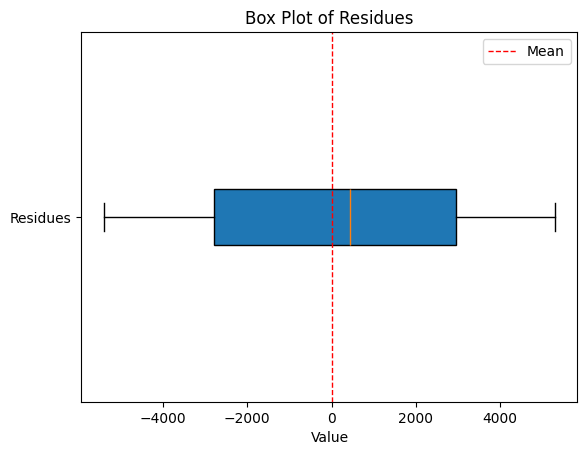

Classes:
   Residuals_  Frequency
0  -3260.0848          2
1  -1120.2231          5
2   1019.6387          3
3   3159.5004          2
4   5299.3622          4 



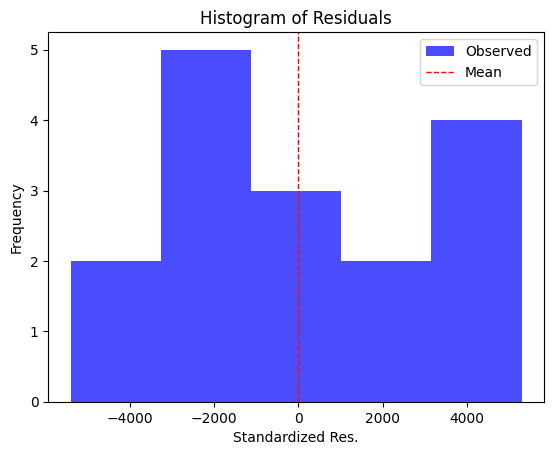

     CDF  Bin Frequency  Expected Value
0 0.1569         0.1569          2.5109
1 0.3646         0.2077          3.3234
2 0.6236         0.2590          4.1436
3 0.8355         0.2119          3.3899
4 0.9492         0.1137          1.8194
5  Sum =         0.9492         15.1872
Chi-Square Table:
       χ^2
0   0.1040
1   0.8458
2   0.3156
3   0.5698
4   2.6134
Sum 4.4487
Chi-square Statistic: 4.181367078095032, p-value: 0.12360261971876567


In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Using describe() to get most of the descriptive statistics
desc_stats = df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = df['Residual'].dropna().quantile(0.25)
Q3 = df['Residual'].dropna().quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard deviation
mean = df['Residual'].dropna().mean()
std_dev = df['Residual'].dropna().std()

# Calculate Sturges' number of bins
n = len(df['Residual'].dropna())
print(n)
k = int(1 + 3.322 * np.log10(n))
classrange = np.ptp(df['Residual'].dropna()) / k
print("Rounded Number of classes:", k)
print("class Range:", classrange)

# Histogram and expected frequencies
hist, bin_edges = np.histogram(df['Residual'].dropna(), bins=k)
cdf_values = stats.norm.cdf(bin_edges + classrange, mean, std_dev)

# Box plot
plt.boxplot(df['Residual'].dropna(), vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Residues')
plt.xlabel('Value')
plt.yticks([1], ['Residues'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Residuals_': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values) - 1):
    if i == 0:
        frequency = cdf_values[0]
    else:
        frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies = np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies = expected_values * (hist.sum() / expected_values.sum())


# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies, ddof=2)
hist_df.Residuals_ = hist_df.Residuals_ + classrange

print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(df['Residual'].dropna(), bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Residuals')
plt.xlabel('Standardized Res.')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_values.sum()]
})

# Append the sum row to the table
table_df = pd.concat([table_df, sum_row], ignore_index=True)

# Display the table
print(table_df)

print("Chi-Square Table:")
print(chi_square_df)

# Print the results
print(f"Chi-square Statistic: {chi_square_stat}, p-value: {p_value}")

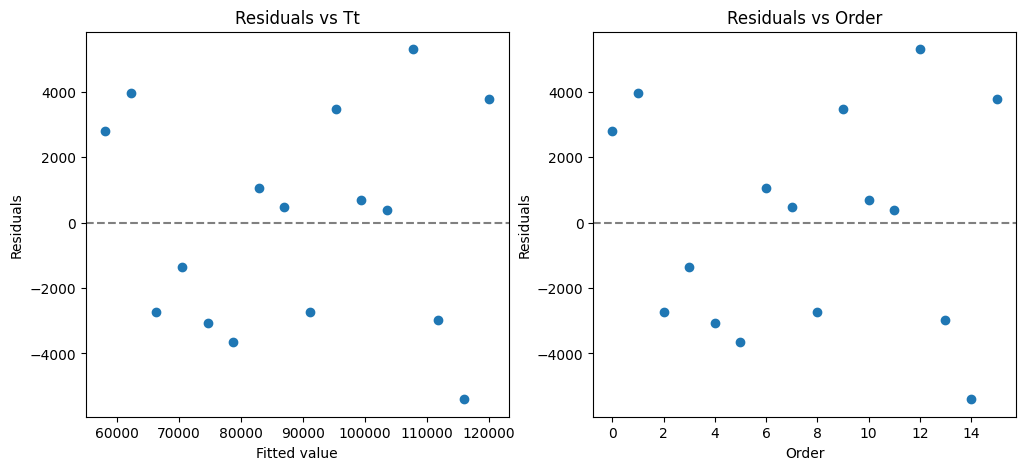

In [11]:
# Prepare the residual plots again with the line connecting points on the second scatter plot
plt.figure(figsize=(12, 5))
# Residuals vs Fitted values
plt.subplot(1, 2, 1)
plt.scatter(dfr['Tt'], dfr['Residual'])
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.title('Residuals vs Tt')

# Residuals vs Order of data with line connecting points
plt.subplot(1, 2, 2)
plt.scatter(df.index, dfr['Residual'])  # Line added here
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Order')
plt.ylabel('Residuals')
plt.title('Residuals vs Order')

#plt.tight_layout()
plt.show()

# **Making prediction:**

In [12]:
# Calculate 'Forecast' as 'St (without It)' * 'Tt'
df['Forecast'] = df['St (without It)'] * df['Tt']
df

,t,Year,Quarter,Sales (Yt),CMA(4),St (with It),St (without It),Deseasonalize (Yt / St),Year_Quarter,Tt,Residual,Forecast
0,1,2020,1,74841.0000,NaN,NaN,1.2291,60893.3617,2020 Q1,58100.8135,2792.5482,71408.8180
1,2,2020,2,70324.0000,NaN,NaN,1.0626,66182.6445,2020 Q2,62235.1713,3947.4732,66129.5150
2,3,2020,3,59016.0000,65999.3750,0.8942,0.9272,63648.1553,2020 Q3,66369.5290,-2721.3737,61539.3189
3,4,2020,4,53249.0000,68828.5000,0.7736,0.7700,69154.5455,2020 Q4,70503.8867,-1349.3413,54287.9928
4,5,2021,1,87976.0000,72371.1250,1.2156,1.2291,71580.4758,2021 Q1,74638.2445,-3057.7687,91734.1513
5,6,2021,2,79822.0000,76496.5000,1.0435,1.0626,75121.3106,2021 Q2,78772.6022,-3651.2916,83701.7699
6,7,2021,3,77859.0000,80856.2500,0.9629,0.9272,83970.1390,2021 Q3,82906.9599,1063.1790,76873.1965
7,8,2021,4,67409.0000,86589.3750,0.7785,0.7704,87503.9351,2021 Q4,87041.3177,462.6175,67052.6208
8,9,2022,1,108694.0000,91606.7500,1.1865,1.2291,88437.3947,2022 Q1,91175.6754,-2738.2807,112059.4845
9,10,2022,2,104969.0000,95067.0000,1.1042,1.0626,98787.4127,2022 Q2,95310.0331,3477.3795,101274.0247


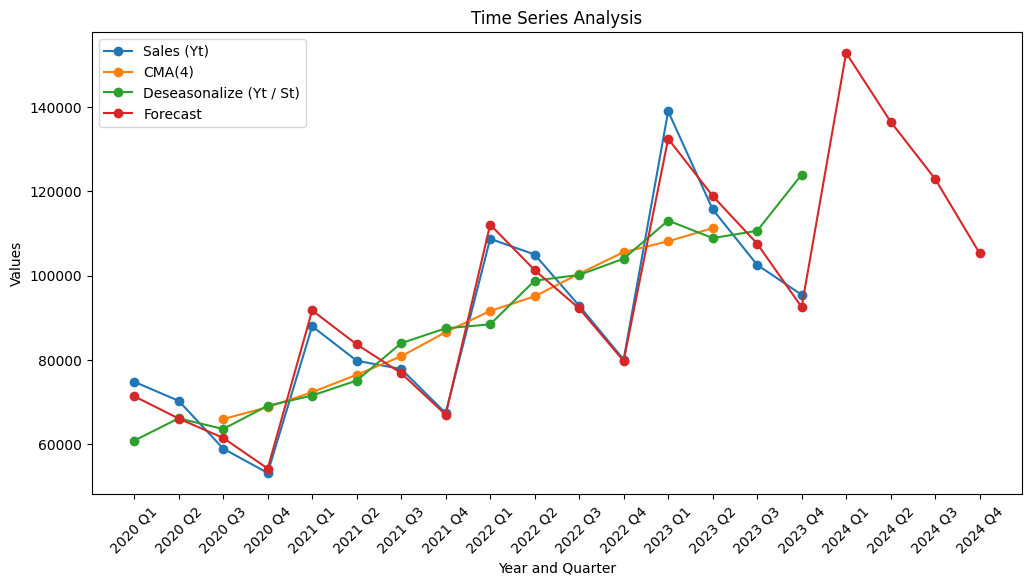

In [13]:
import matplotlib.pyplot as plt

# Create a new column for 'Year_Quarter' to use on the X-axis
df['Year_Quarter'] = df['Year'].astype(str) + ' Q' + df['Quarter'].astype(str)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'Sales (Yt)'
plt.plot(df['Year_Quarter'], df['Sales (Yt)'], marker='o', label='Sales (Yt)', linestyle='-')

# Plot 'CMA(4)'
plt.plot(df['Year_Quarter'], df['CMA(4)'], marker='o', label='CMA(4)', linestyle='-')

# Plot 'Deseasonalize (Yt / St)'
plt.plot(df['Year_Quarter'], df['Deseasonalize (Yt / St)'], marker='o', label='Deseasonalize (Yt / St)', linestyle='-')

# Plot 'Forecast'
plt.plot(df['Year_Quarter'], df['Forecast'], marker='o', label='Forecast', linestyle='-')

# Adding title and labels
plt.title('Time Series Analysis')
plt.xlabel('Year and Quarter')
plt.ylabel('Values')

# Adding legend
plt.legend()

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# **Forecasting t=16(2023-Quarter 4) and t=20(2024-Quarter 4) with the lower bound and upper bound:**


In [14]:
from scipy import stats

# We need to calculate the standard error of the prediction and the prediction intervals
# Based on the provided parameters and specified time values for predictions

# Parameters
alpha = 0.05  # Significance level
prediction_level = 0.95  # Confidence level
x_bar = df[df["Residual"].notna()]["t"].mean()  # Mean of time
s_x = df[df["Residual"].notna()]["t"].std()  # Standard deviation of time
n = len(df[df["Residual"].notna()])  # Sample size
t_value = stats.t.ppf(1 - alpha/2, df=n-1)  # t-value for 95% confidence

# Time values for which we want to calculate prediction intervals
time_values = [16, 20]

# Data for the model
X = df['t'].values.reshape(-1, 1)
y = df['Forecast'].values

# Residual standard error (RSE)
residuals = dfr["Residual"]
RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

# Define function to calculate prediction interval
def predict_interval(x_new, x_mean, s_x, RSE, n, t_value):
    SE_pred = RSE * np.sqrt(1 + 1/n + ((x_new - x_mean)**2) / ((s_x**2) * (n - 1)))
    prediction =df.loc[df['t'] == x_new, 'Forecast'].iloc[0]
    lower_bound = prediction - t_value * SE_pred
    upper_bound = prediction + t_value * SE_pred
    return SE_pred, lower_bound, prediction, upper_bound

# Calculate prediction intervals for each spending value
predictions = [predict_interval(x, x_bar, s_x, RSE, n, t_value) for x in time_values]

# Prepare the table with the results
prediction_table = pd.DataFrame(predictions,
                                columns=['St_Error_of_Prediction', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound'],
                                index=time_values)

# Add t-value and error columns
prediction_table['t_value'] = t_value
prediction_table['Error'] = RSE

# Reorder columns for the final table
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

prediction_table.reset_index().rename(columns={'index': 'Spending (x)'})

# Calculate prediction intervals and error based on t-value * St. Error of Prediction
prediction_table['Error'] = prediction_table['t_value'] * prediction_table['St_Error_of_Prediction']

# Reorder columns for the final table after updating the Error column
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]


prediction_table

,t_value,St_Error_of_Prediction,Error,Lower_Bound,Point_Prediction,Upper_Bound
16,2.1314,3712.8667,7913.7880,84618.1825,92531.9705,100445.7586
20,2.1314,4036.6835,8603.9871,96667.6583,105271.6454,113875.6325


# **Visualising the forecasted points**

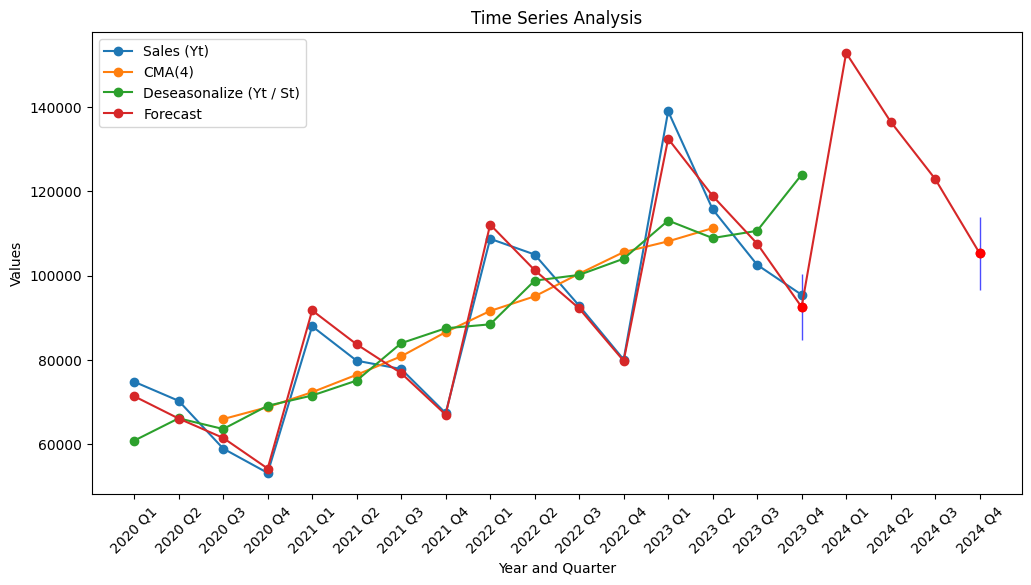

In [15]:
import matplotlib.pyplot as plt

# Assuming 'Year_Quarter' is a column in df that corresponds to 't'
# Create a mapping from 't' values to 'Year_Quarter'
time_to_quarter = dict(zip(df['t'], df['Year_Quarter']))

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot existing time series
plt.plot(df['Year_Quarter'], df['Sales (Yt)'], marker='o', label='Sales (Yt)', linestyle='-')
plt.plot(df['Year_Quarter'], df['CMA(4)'], marker='o', label='CMA(4)', linestyle='-')
plt.plot(df['Year_Quarter'], df['Deseasonalize (Yt / St)'], marker='o', label='Deseasonalize (Yt / St)', linestyle='-')
plt.plot(df['Year_Quarter'], df['Forecast'], marker='o', label='Forecast', linestyle='-')

# Plot the point predictions and fill between the prediction intervals
for time_value in time_values:
    quarter = time_to_quarter[time_value]
    prediction_row = prediction_table.loc[time_value]
    plt.plot(quarter, prediction_row['Point_Prediction'], 'ro')  # Mark point prediction
    plt.fill_between([quarter], prediction_row['Lower_Bound'], prediction_row['Upper_Bound'], color='blue', alpha=0.7)  # Fill between bounds

# Adding title and labels
plt.title('Time Series Analysis')
plt.xlabel('Year and Quarter')
plt.ylabel('Values')

# Adding legend
plt.legend()

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
